In [1]:
from bokeh.io import output_notebook, show
output_notebook()

ModuleNotFoundError: No module named 'bokeh'

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.options.display.max_columns = None
pd.options.display.max_rows = 300
sns.set_theme(style="ticks", color_codes=True)

In [36]:
ex = pd.read_csv('table_extended_PCR.csv')
ex.columns

Index(['_p_id', 'level_1', '_patient_id', '_health_dep', '_age', '_gender',
       'date_in', 'n_days_in', 'worst_barthel_scale', 'n_covid_rel_dx',
       'covid_rel_dx', 'n_covid_rel_image', 'covid_rel_image', 'n_PCRs_+',
       'n_days_icu', 'worst_sofa_scale', 'worst_glasgow', 'critic', 'severity',
       '_discharge', 'who_out_scale', 'date_icu_in', 'worst_glasgow_scale'],
      dtype='object')

/home/auri/anaconda3/envs/nlpMED/lib/python3.7/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/auri/anaconda3/envs/nlpMED/lib/python3.7/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(*args, **kwargs)
/home/auri/anaconda3/envs/nlpMED/lib/python3.7/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(*args, **kwargs)
/home/auri/anaconda3/envs/nlpMED/lib/python3.7/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout

Admissions distribution by age and sex


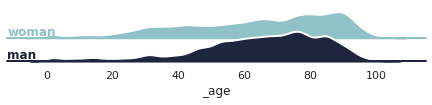

In [37]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data


df = ex[['_age', '_gender']]

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(2, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="_gender", hue="_gender", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "_age",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "_age", clip_on=False, color="w", lw=2, bw_adjust=.5)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "_age")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)
print("Admissions distribution by age and sex")

In [38]:
ex.describe()

,_p_id,level_1,_health_dep,_age,worst_barthel_scale,n_covid_rel_dx,n_covid_rel_image,n_PCRs_+,worst_sofa_scale,worst_glasgow,severity,worst_glasgow_scale
count,5757.000000,5757.000000,5757.000000,5757.000000,2547.000000,5757.000000,5757.000000,5757.000000,73.000000,0.0,5614.000000,96.000000
mean,2240.232065,0.410109,11.627758,63.780094,73.370632,1.081640,0.582769,0.874935,1.465753,NaN,2.807089,12.260417
std,1262.863435,1.028666,7.294215,21.733115,38.220883,1.249853,1.563005,1.495764,1.323738,NaN,0.877503,4.267983
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,3.000000
25%,1174.000000,0.000000,5.000000,51.000000,45.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,10.750000
50%,2254.000000,0.000000,12.000000,67.000000,100.000000,1.000000,0.000000,0.000000,1.000000,NaN,3.000000,15.000000
75%,3316.000000,0.000000,19.000000,81.000000,100.000000,2.000000,1.000000,1.000000,2.000000,NaN,3.000000,15.000000
max,4467.000000,13.000000,21.000000,102.000000,100.000000,12.000000,27.000000,18.000000,6.000000,NaN,5.000000,15.000000


In [39]:
#Severity grade (following AE grading system 1-5: 
        #1-mild(ER only, does not require hospitalization), 
        #2-moderate( hospitalization <= 5 days)
        #3-severe(prolongs hospitalization > 5 days), 
        #4-critical(life threatening = UCI), 
        #5-fatal 

In [40]:
ex.columns

Index(['_p_id', 'level_1', '_patient_id', '_health_dep', '_age', '_gender',
       'date_in', 'n_days_in', 'worst_barthel_scale', 'n_covid_rel_dx',
       'covid_rel_dx', 'n_covid_rel_image', 'covid_rel_image', 'n_PCRs_+',
       'n_days_icu', 'worst_sofa_scale', 'worst_glasgow', 'critic', 'severity',
       '_discharge', 'who_out_scale', 'date_icu_in', 'worst_glasgow_scale'],
      dtype='object')

In [42]:
df_17 = ex[ex._health_dep == 17]
df_17[((df_17['n_PCRs_+'] > 0) & ((df_17.n_covid_rel_dx > 0) | (df_17.n_covid_rel_image > 0)))].to_csv('17_filtered_admissions.csv', index = False)

In [6]:
df = ex.groupby('severity')._p_id.count().reset_index()
df['admissions'] = df._p_id
df

,severity,_p_id,admissions
0,2.0,2323,2323
1,3.0,2535,2535
2,4.0,272,272
3,5.0,484,484


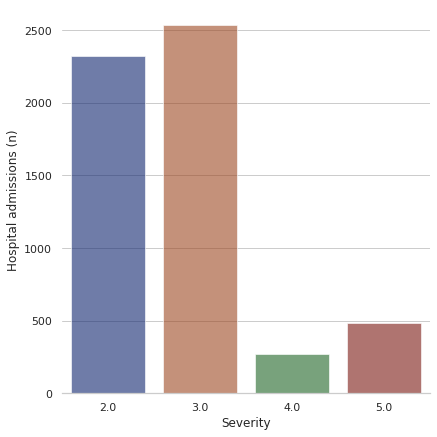

In [50]:
sns.set_theme(style="whitegrid")



# Draw a nested barplot by species and sex
g = sns.catplot(
    data=df, kind="bar",
    x="severity", y="admissions",
    ci="sd", palette="dark", alpha=.6, height=6
)

g.despine(left=True)
g.set_axis_labels("Severity", "Hospital admissions (n)")


In [21]:
ex.severity.describe()

count    5614.000000
mean        2.807089
std         0.877503
min         2.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: severity, dtype: float64

In [59]:
ex['critic_bool'] =  False
ex.loc[(ex.critic != 'False'), 'critic_bool'] =  True

df = ex.groupby('critic_bool')._p_id.count().reset_index()
df['admissions'] = df._p_id
df

,critic_bool,_p_id,admissions
0,False,5001,5001
1,True,756,756


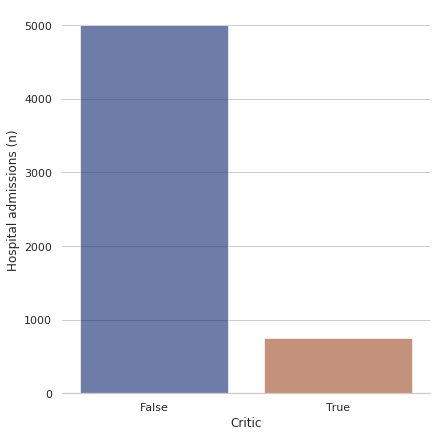

In [62]:

sns.set_theme(style="whitegrid")



# Draw a nested barplot by species and sex
g = sns.catplot(
    data=df, kind="bar",
    x="critic_bool", y="admissions",
    ci="sd", palette="dark", alpha=.6, height=6
)

g.despine(left=True)
g.set_axis_labels("Critic", "Hospital admissions (n)")


In [73]:
ex.n_days_in = pd.to_timedelta(ex.n_days_in)
ex.n_days_in

0       1 days
1       7 days
2       4 days
3       7 days
4       6 days
         ...  
5752    6 days
5753    7 days
5754   21 days
5755    9 days
5756    2 days
Name: n_days_in, Length: 5757, dtype: timedelta64[ns]

In [74]:
ex.loc[ex.n_covid_rel_dx > 0].n_days_in.describe()

count                          3137
mean     11 days 07:38:34.695569015
std      11 days 18:48:31.381439551
min                 0 days 00:00:00
25%                 5 days 00:00:00
50%                 8 days 00:00:00
75%                13 days 00:00:00
max               132 days 00:00:00
Name: n_days_in, dtype: object

In [75]:
ex.loc[ex.n_covid_rel_dx == 0].n_days_in.describe()

count                         2620
mean     5 days 18:28:34.809160305
std      8 days 11:24:52.365250155
min                0 days 00:00:00
25%                2 days 00:00:00
50%                4 days 00:00:00
75%                7 days 00:00:00
max              153 days 00:00:00
Name: n_days_in, dtype: object

In [76]:
ex.loc[ex.n_covid_rel_image > 0].n_days_in.describe()

count                          1466
mean     13 days 12:29:28.076398363
std      13 days 18:59:08.971598477
min                 0 days 00:00:00
25%                 6 days 00:00:00
50%                 9 days 00:00:00
75%                15 days 00:00:00
max               126 days 00:00:00
Name: n_days_in, dtype: object

In [77]:
ex.loc[ex.n_covid_rel_image == 0].n_days_in.describe()

count                         4291
mean     7 days 04:16:43.402470286
std      8 days 23:12:40.258879482
min                0 days 00:00:00
25%                2 days 00:00:00
50%                5 days 00:00:00
75%                9 days 00:00:00
max              153 days 00:00:00
Name: n_days_in, dtype: object

In [82]:
ex.loc[ex['n_PCRs_+'] > 0].n_days_in.describe()

count                          2553
mean     12 days 00:34:24.394829612
std      12 days 04:36:34.144897207
min                 0 days 00:00:00
25%                 5 days 00:00:00
50%                 9 days 00:00:00
75%                14 days 00:00:00
max               126 days 00:00:00
Name: n_days_in, dtype: object

In [83]:
ex.loc[ex['n_PCRs_+'] == 0].n_days_in.describe()

count                         3204
mean     6 days 05:15:30.337078651
std      8 days 15:53:14.183303998
min                0 days 00:00:00
25%                2 days 00:00:00
50%                4 days 00:00:00
75%                7 days 00:00:00
max              153 days 00:00:00
Name: n_days_in, dtype: object

In [ ]:
ex.plot.hist